In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('quikr_car.csv')

In [3]:
data2 = pd.DataFrame(data)

In [4]:
backup = data

In [5]:
data2.shape

(892, 6)

In [6]:
data2.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [7]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [8]:
data2.isnull().sum()

name           0
company        0
year           0
Price          0
kms_driven    52
fuel_type     55
dtype: int64

In [9]:
for column in data2.columns:
    print(data2[column].unique())
    print('*'*150)

['Hyundai Santro Xing XO eRLX Euro III' 'Mahindra Jeep CL550 MDI'
 'Maruti Suzuki Alto 800 Vxi' 'Hyundai Grand i10 Magna 1.2 Kappa VTVT'
 'Ford EcoSport Titanium 1.5L TDCi' 'Ford Figo' 'Hyundai Eon'
 'Ford EcoSport Ambiente 1.5L TDCi' 'Maruti Suzuki Alto K10 VXi AMT'
 'Skoda Fabia Classic 1.2 MPI' 'Maruti Suzuki Stingray VXi'
 'Hyundai Elite i20 Magna 1.2' 'Mahindra Scorpio SLE BS IV' 'Audi A8'
 'Audi Q7' 'Mahindra Scorpio S10' 'Maruti Suzuki Alto 800'
 'Hyundai i20 Sportz 1.2' 'Maruti Suzuki Alto 800 Lx'
 'Maruti Suzuki Vitara Brezza ZDi' 'Maruti Suzuki Alto LX'
 'Mahindra Bolero DI' 'Maruti Suzuki Swift Dzire ZDi'
 'Mahindra Scorpio S10 4WD' 'Maruti Suzuki Swift Vdi BSIII'
 'Maruti Suzuki Wagon R VXi BS III' 'Maruti Suzuki Wagon R VXi Minor'
 'Toyota Innova 2.0 G 8 STR BS IV' 'Renault Lodgy 85 PS RXL'
 'Skoda Yeti Ambition 2.0 TDI CR 4x2' 'Maruti Suzuki Baleno Delta 1.2'
 'Renault Duster 110 PS RxZ Diesel Plus' 'Renault Duster 85 PS RxE Diesel'
 'Honda City 1.5 S MT' 'Maruti Suzuki D

In [10]:
for column in data2.columns:
    print(data2[column].value_counts())
    print('*'*150)
    

name
Honda City                         13
Honda Amaze                        11
Maruti Suzuki Dzire                10
Mahindra Scorpio S10                9
Maruti Suzuki Alto 800 Lxi          9
                                   ..
Mahindra Bolero DI BSII             1
Audi Q3 2.0 TDI quattro Premium     1
Skoda Superb 1.8 TFSI AT            1
BMW 5 Series 520d Sedan             1
Chevrolet Sail 1.2 LT ABS           1
Name: count, Length: 525, dtype: int64
******************************************************************************************************************************************************
company
Maruti        235
Hyundai       145
Mahindra      100
Tata           74
Honda          61
Toyota         39
Chevrolet      35
Renault        34
Ford           31
Volkswagen     20
Skoda          13
Audi           11
Datsun          8
Mini            8
BMW             8
Nissan          6
Commercial      6
Mercedes        6
Mitsubishi      6
Force           4
Fiat            4
t

# Anomalies

- Many objects for int
- Too many things in name , slice to 3 words
- Year has objs
- price has , and non int
- company has int
- kms driven has , and kms for int
- nan value in fuel



# For year

In [11]:
data2 = data2[data2['year'].str.isnumeric()]

In [12]:
data2['year'] = data2['year'].astype(int)

In [13]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 842 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        842 non-null    object
 1   company     842 non-null    object
 2   year        842 non-null    int32 
 3   Price       842 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: int32(1), object(5)
memory usage: 42.8+ KB


# For Price

In [14]:
data2 = data2[data2['Price']!= 'Ask For Price']

In [15]:
data2['Price'] = data2['Price'].str.replace(',','').astype(int)

In [16]:
data2['Price'].head()

0     80000
1    425000
3    325000
4    575000
6    175000
Name: Price, dtype: int32

# For kms Driven

In [17]:
data2['kms_driven'] = data2['kms_driven'].str.split(' ').str.get(0).str.replace(',','')

In [18]:
data2 = data2[data2['kms_driven'].str.isnumeric()]

In [19]:
data2['kms_driven'] = data2['kms_driven'].astype(int)

In [20]:
data2.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,425000,40,Diesel
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000,28000,Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,575000,36000,Diesel
6,Ford Figo,Ford,2012,175000,41000,Diesel


# For fuel type

In [21]:
data2 = data2[~data2['fuel_type'].isna()]

In [22]:
data2['fuel_type'].unique()

array(['Petrol', 'Diesel', 'LPG'], dtype=object)

# For company

In [23]:
data2['company'].value_counts()

company
Maruti        221
Hyundai       139
Mahindra       98
Tata           65
Honda          60
Toyota         36
Chevrolet      34
Renault        33
Ford           30
Volkswagen     19
Skoda          13
Audi           11
Mini            8
BMW             8
Datsun          7
Mitsubishi      6
Nissan          6
Mercedes        6
Fiat            4
Force           4
Hindustan       3
Jaguar          2
Land            1
Jeep            1
Volvo           1
Name: count, dtype: int64

In [24]:
data2 = data2[~data2['company'].str.isnumeric()]

In [25]:
print((data2['company'].value_counts) == 1)

False


In [26]:
data2['company'].value_counts()

company
Maruti        221
Hyundai       139
Mahindra       98
Tata           65
Honda          60
Toyota         36
Chevrolet      34
Renault        33
Ford           30
Volkswagen     19
Skoda          13
Audi           11
Mini            8
BMW             8
Datsun          7
Mitsubishi      6
Nissan          6
Mercedes        6
Fiat            4
Force           4
Hindustan       3
Jaguar          2
Land            1
Jeep            1
Volvo           1
Name: count, dtype: int64

# For Name

In [27]:
data2['name'].head(1)

0    Hyundai Santro Xing XO eRLX Euro III
Name: name, dtype: object

In [28]:
data2['name'] = data2['name'].str.split(' ').str.slice(0,3).str.join(' ')

In [29]:
data2 = data2.reset_index(drop = True)

In [30]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        816 non-null    object
 1   company     816 non-null    object
 2   year        816 non-null    int32 
 3   Price       816 non-null    int32 
 4   kms_driven  816 non-null    int32 
 5   fuel_type   816 non-null    object
dtypes: int32(3), object(3)
memory usage: 28.8+ KB


In [31]:
data2.describe()

,year,Price,kms_driven
count,816.000000,8.160000e+02,816.000000
mean,2012.444853,4.117176e+05,46275.531863
std,4.002992,4.751844e+05,34297.428044
min,1995.000000,3.000000e+04,0.000000
25%,2010.000000,1.750000e+05,27000.000000
50%,2013.000000,2.999990e+05,41000.000000
75%,2015.000000,4.912500e+05,56818.500000
max,2019.000000,8.500003e+06,400000.000000


# Idetifing the Outlier

<Axes: xlabel='Price', ylabel='Count'>

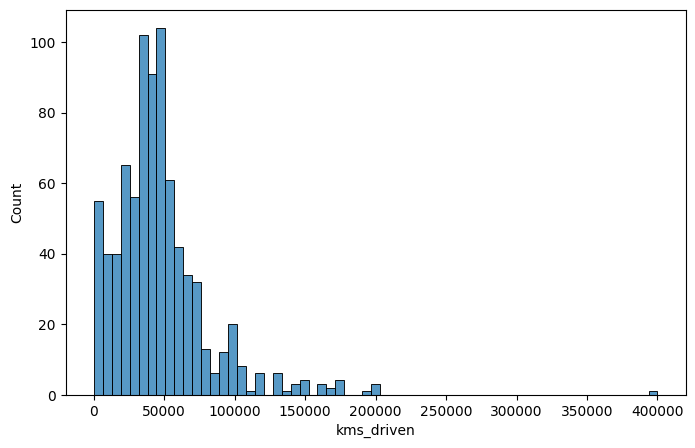

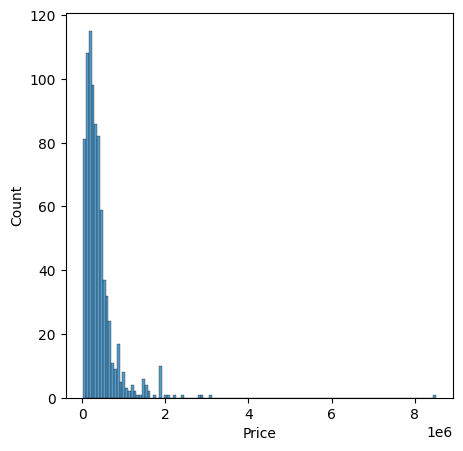

In [32]:
fig, ax = plt.subplots(figsize = (8,5))
sns.histplot(data2.kms_driven)
fig, ax = plt.subplots(figsize = (5,5))
sns.histplot(data2.Price)

## Outliers

In [33]:
data2[data2['Price']>6e6]

,name,company,year,Price,kms_driven,fuel_type
534,Mahindra XUV500 W6,Mahindra,2014,8500003,45000,Diesel


In [34]:
data2[data2['kms_driven']>350000]

,name,company,year,Price,kms_driven,fuel_type
348,Honda City 1.5,Honda,2010,240000,400000,Petrol


In [35]:
data2 = data2[data2['Price']<6e6].reset_index(drop= True)

In [36]:
data2 = data2[data2['kms_driven']<350000].reset_index(drop= True)

In [37]:
data2.describe()

,year,Price,kms_driven
count,814.000000,8.140000e+02,814.000000
mean,2012.445946,4.019921e+05,45842.547912
std,4.006625,3.817812e+05,32017.452360
min,1995.000000,3.000000e+04,0.000000
25%,2010.000000,1.750000e+05,27000.000000
50%,2013.000000,2.999990e+05,41000.000000
75%,2015.000000,4.900000e+05,56681.000000
max,2019.000000,3.100000e+06,200000.000000


# Cleaned Data

In [38]:
data2.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel


In [39]:
data2.to_csv('Cleaned Car_data.csv')

In [40]:
data2.describe(include='all')

,name,company,year,Price,kms_driven,fuel_type
count,814,814,814.000000,8.140000e+02,814.000000,814
unique,254,25,NaN,NaN,NaN,3
top,Maruti Suzuki Swift,Maruti,NaN,NaN,NaN,Petrol
freq,51,221,NaN,NaN,NaN,427
mean,NaN,NaN,2012.445946,4.019921e+05,45842.547912,NaN
std,NaN,NaN,4.006625,3.817812e+05,32017.452360,NaN
min,NaN,NaN,1995.000000,3.000000e+04,0.000000,NaN
25%,NaN,NaN,2010.000000,1.750000e+05,27000.000000,NaN
50%,NaN,NaN,2013.000000,2.999990e+05,41000.000000,NaN
75%,NaN,NaN,2015.000000,4.900000e+05,56681.000000,NaN


In [41]:
data2[['year','kms_driven','Price']].corr()

,year,kms_driven,Price
year,1.000000,-0.242410,0.347564
kms_driven,-0.242410,1.000000,-0.154724
Price,0.347564,-0.154724,1.000000


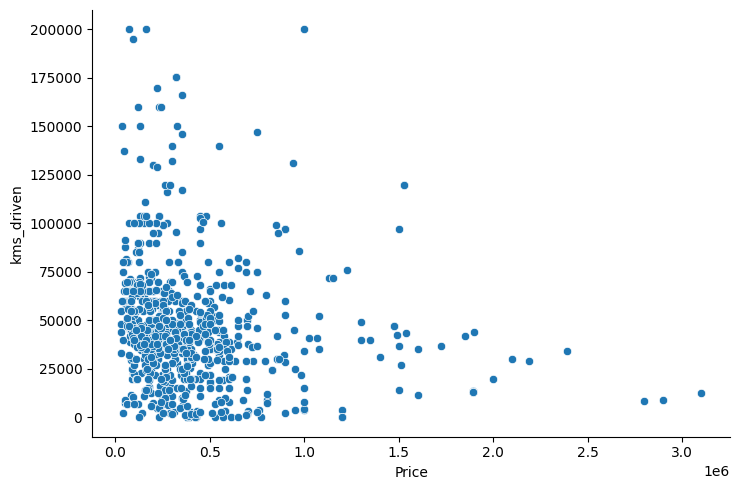

In [42]:
sns.relplot(x='Price',y='kms_driven', aspect=1.5, data = data2,height = 5)

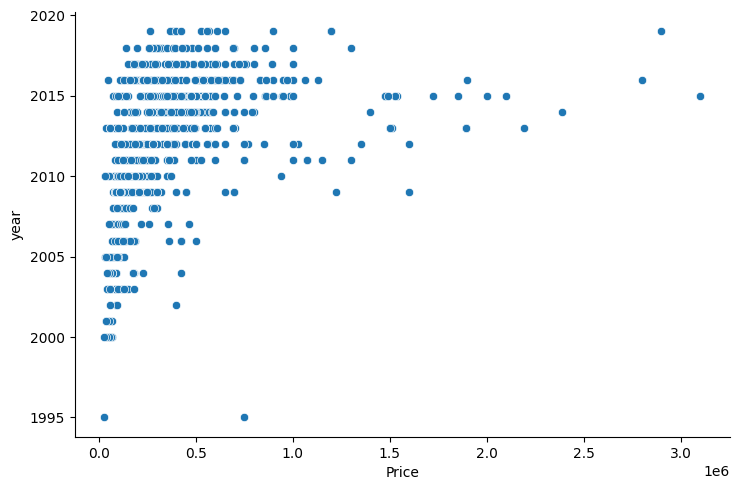

In [43]:
sns.relplot(x='Price',y='year', aspect=1.5, data = data2,height = 5)

# Splitting 

In [44]:
X = data2.drop(columns='Price',axis=1)
Y = np.log(data2['Price'])

In [45]:
print(Y)

0      11.289782
1      12.959844
2      12.691580
3      13.262125
4      12.072541
         ...    
809    12.506177
810    11.608236
811    12.611538
812    12.468437
813    12.873902
Name: Price, Length: 814, dtype: float64


In [46]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)


# Importing models and pipeline

In [60]:
from sklearn.compose import ColumnTransformer,make_column_transformer
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.preprocessing import StandardScaler
# # # # # # # # # # # # # # # # 
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,ExtraTreesClassifier,AdaBoostRegressor

In [48]:
data2.head(1)

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol


<div class="alert alert-block alert-warning" style="color: red; font-size: 36px;">
 Update !! <br> adding a funtion to do all belows work in one Go.
</div>


In [63]:
def Automate_the_model_testing(model,X_train,X_test,Y_train,Y_test):
    ohe = OneHotEncoder()
    ohe.fit(X[['name','company','fuel_type']])
    
    columntran = make_column_transformer(
        (OneHotEncoder(categories=ohe.categories_),['name','company','fuel_type']),
        (StandardScaler(),['year','kms_driven']),
        remainder='passthrough'                                    
    )
    pipe = make_pipeline(columntran,model)
    
    pipe.fit(X_train,Y_train)
    ypred = pipe.predict(X_test)
    
    print(f'R2 score for {model.__class__.__name__} is :',r2_score(Y_test,ypred))
    print(f'MAE for {model.__class__.__name__} is:',mean_absolute_error(Y_test,ypred))

models = [
    Lasso(alpha=0.0001),
    Ridge(alpha=0.0001),
    SVR(kernel='linear'),
    XGBRegressor(),
    KNeighborsRegressor(n_neighbors=4),
    DecisionTreeRegressor(max_depth=8),
    RandomForestRegressor(n_estimators=200,
                         max_features=0.01,
                         random_state=10),
    LinearRegression(),
    GradientBoostingRegressor(n_estimators=500),
    AdaBoostRegressor(n_estimators=10),
    
    
        ]
for model in models:
    Automate_the_model_testing(model,X_train,X_test,Y_train,Y_test)
    print('-'*50)

R2 score for Lasso is : 0.7364270028627502
MAE for Lasso is: 0.27649852684455906
--------------------------------------------------
R2 score for Ridge is : 0.7470186641489331
MAE for Ridge is: 0.27421810211823056
--------------------------------------------------
R2 score for SVR is : 0.7462842106947759
MAE for SVR is: 0.2708572300686751
--------------------------------------------------
R2 score for XGBRegressor is : 0.7252433196216155
MAE for XGBRegressor is: 0.2942731088431067
--------------------------------------------------
R2 score for KNeighborsRegressor is : 0.6939054111587208
MAE for KNeighborsRegressor is: 0.31920157542085675
--------------------------------------------------
R2 score for DecisionTreeRegressor is : 0.5869878351992208
MAE for DecisionTreeRegressor is: 0.3780588596553586
--------------------------------------------------
R2 score for RandomForestRegressor is : 0.7325614388574102
MAE for RandomForestRegressor is: 0.28306772704387384
----------------------------

# so the best is linear regressor

In [75]:
scores = []
for i in range(1000) :
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=i)
    lr = LinearRegression()
    pipe = make_pipeline(columntran,lr)
    pipe.fit(X_train,Y_train)
    ypred = pipe.predict(X_test)
    scores.append(r2_score(Y_test,ypred))
    

In [76]:
np.argmax(scores)

515

In [69]:
scores[np.argmax(scores)]

0.8833946565113739

# Now Finally

r2 score 0.8833946565113739
MAE 0.19823791216229714


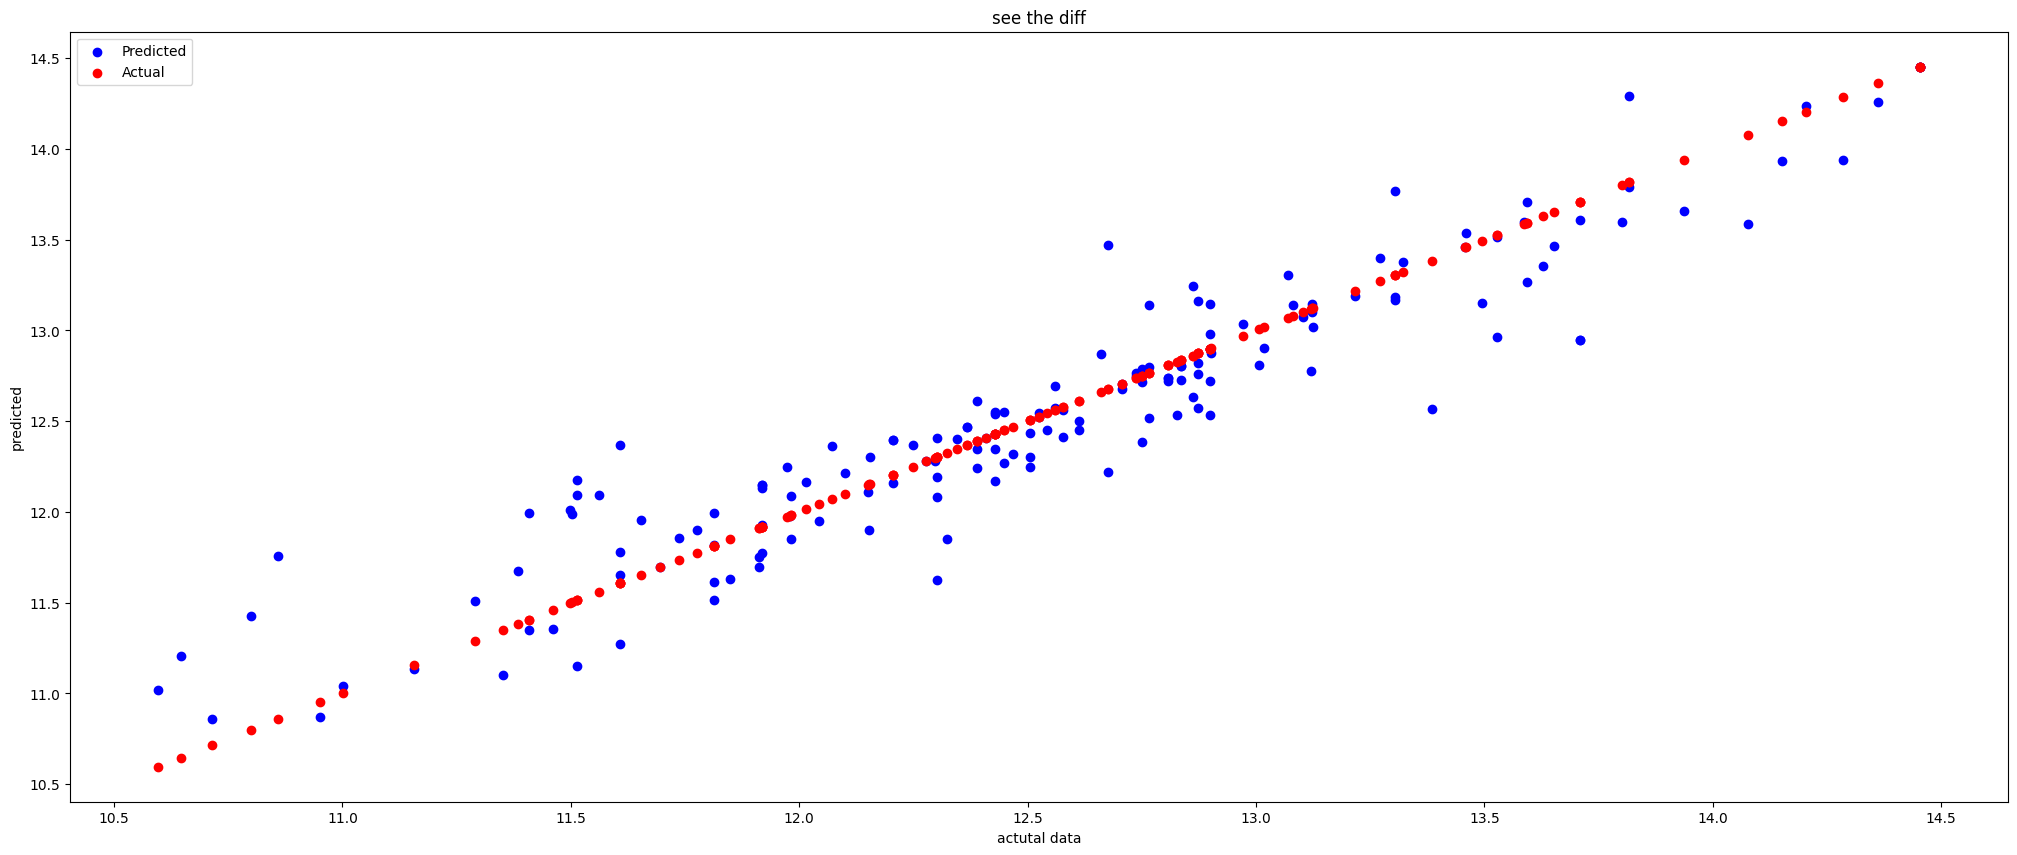

In [74]:
# linear one
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=515)
ohe = OneHotEncoder()
ohe.fit(X[['name','company','fuel_type']])
columntran = make_column_transformer(
            (OneHotEncoder(categories=ohe.categories_),['name','company','fuel_type']),
            (StandardScaler(),['kms_driven','year']),
            remainder='passthrough'
            )
lr = LinearRegression()

pipe = make_pipeline(columntran,lr)

pipe.fit(X_train,Y_train)

ypred = pipe.predict(X_test)
print('r2 score',r2_score(Y_test,ypred))
print('MAE',mean_absolute_error(Y_test,ypred))
# Create a figure with a specified size
plt.figure(figsize=(25, 10))

# Scatter plot with different colors for actual and predicted data
plt.scatter(Y_test, ypred, c='blue', label='Predicted')
plt.scatter(Y_test, Y_test, c='red', label='Actual')
plt.xlabel('actutal data')
plt.ylabel('predicted')
plt.title("see the diff")
plt.legend()
plt.show()

<div class="alert alert-block alert-warning" style="color: red; font-size: 36px;">
  |<br>v<br> Down here are scrap codes
</div>


# Making pipelines for different models and checking the scores

## LINEAR

In [50]:
step1 = ColumnTransformer(transformers=[
    ('col_tran',OneHotEncoder(drop='first',sparse_output=False, handle_unknown='ignore'),[0,1,4]),
    ('numscal',StandardScaler(),[2,3])
],remainder ='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])
pipe.fit(X_train,Y_train)
ypred = pipe.predict(X_test)
print('r2 score',r2_score(Y_test,ypred))
print('MAE',mean_absolute_error(Y_test,ypred))

r2 score -2.3669832968615137e+21
MAE 10433149954.916304


C:\Users\amane chor\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:228: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


## Identifing the issue

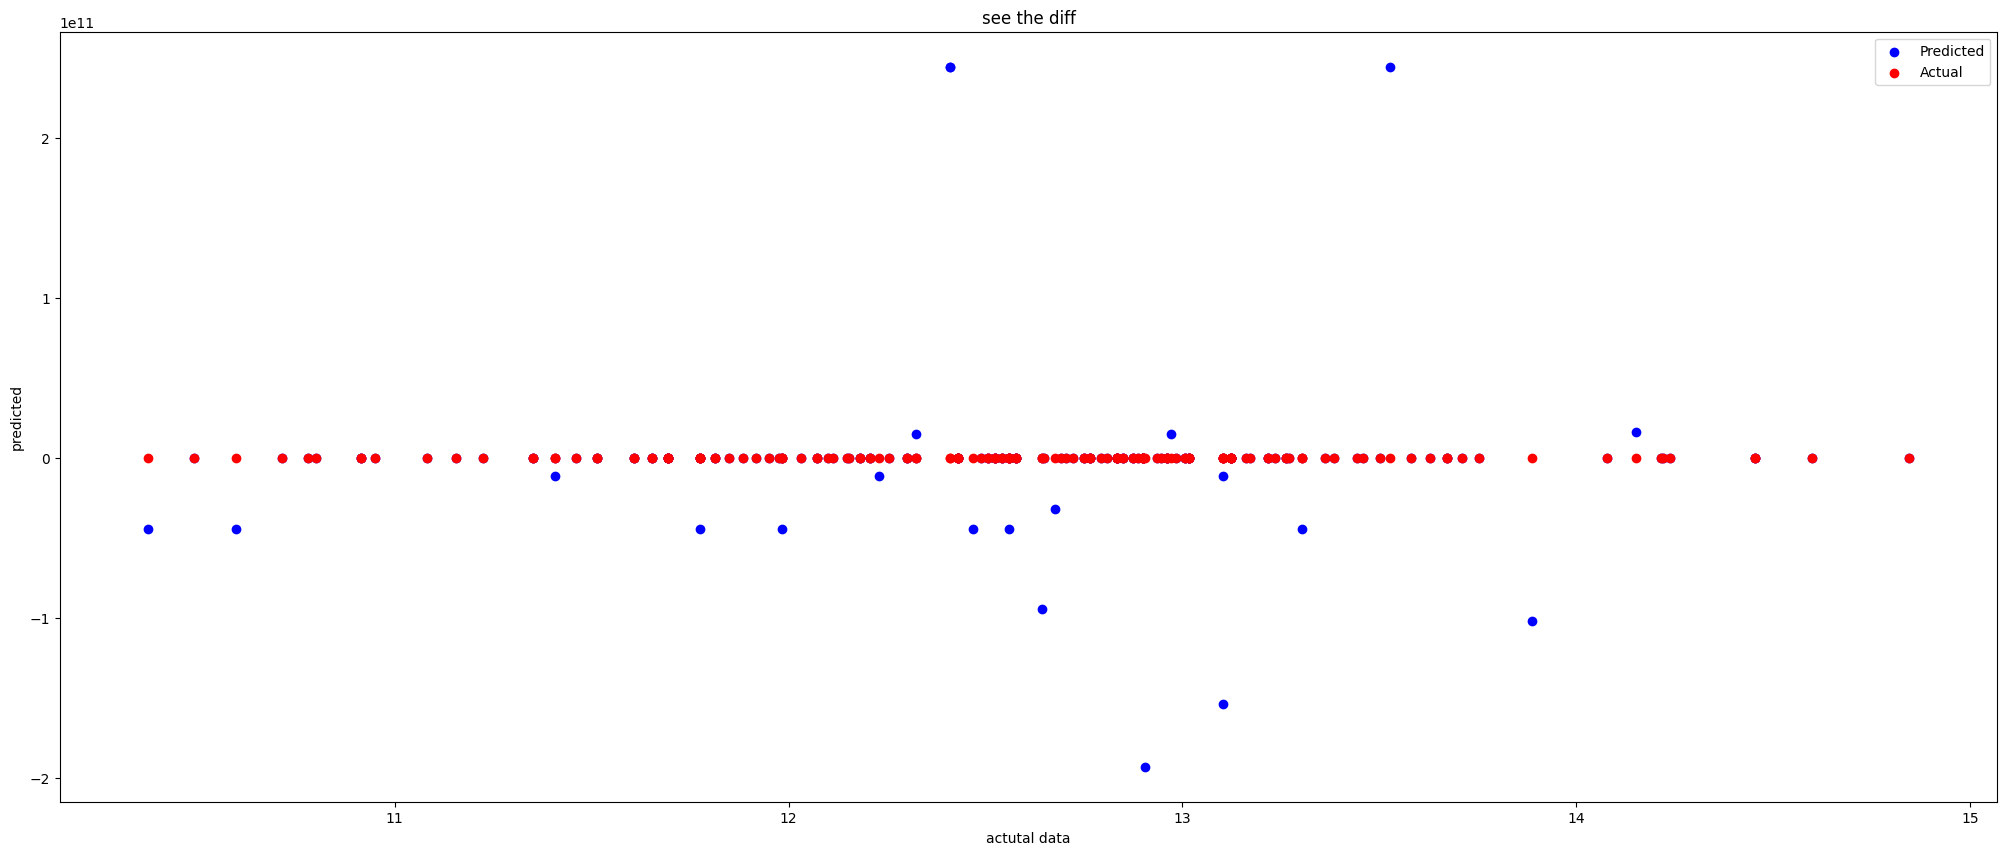

In [51]:
# Create a figure with a specified size
plt.figure(figsize=(25, 10))

# Scatter plot with different colors for actual and predicted data
plt.scatter(Y_test, ypred, c='blue', label='Predicted')
plt.scatter(Y_test, Y_test, c='red', label='Actual')
plt.xlabel('actutal data')
plt.ylabel('predicted')
plt.title("see the diff")
plt.legend()
plt.show()

### Going for another approach than above

# LinearRegression

r2 score 0.7469644886501956
MAE 0.2742720984422792


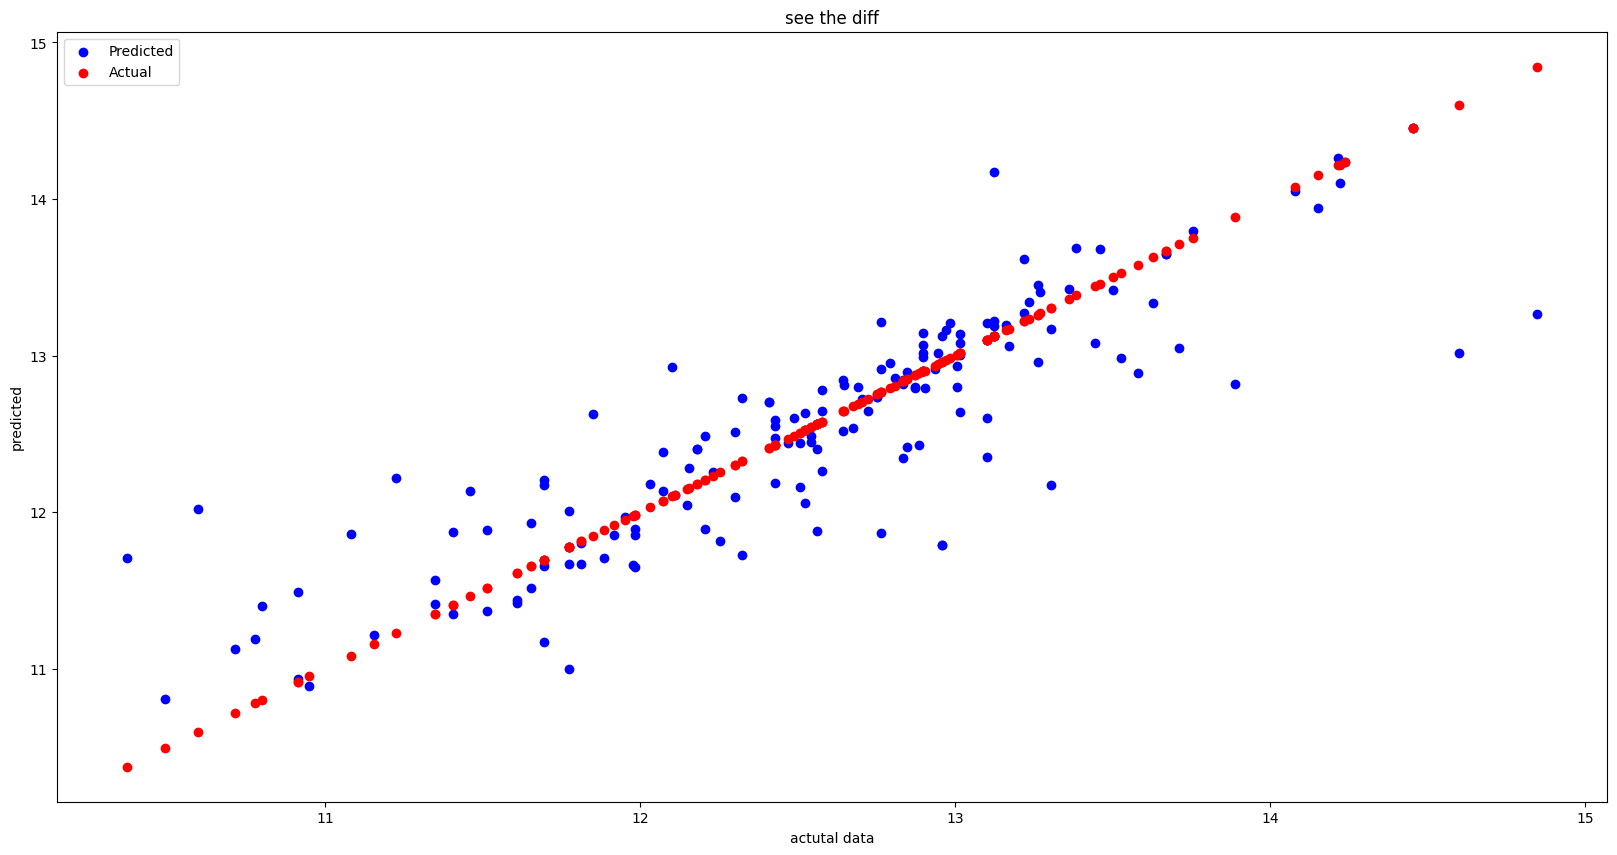

In [52]:
ohe = OneHotEncoder()
ohe.fit(X[['name','company','fuel_type']])
columntran = make_column_transformer(
            (OneHotEncoder(categories=ohe.categories_),['name','company','fuel_type']),
            (StandardScaler(),['kms_driven','year']),
            remainder='passthrough'
            )
lr = LinearRegression()

pipe = make_pipeline(columntran,lr)

pipe.fit(X_train,Y_train)

ypred = pipe.predict(X_test)
print('r2 score',r2_score(Y_test,ypred))
print('MAE',mean_absolute_error(Y_test,ypred))

# Create a figure with a specified size
plt.figure(figsize=(20, 10))

# Scatter plot with different colors for actual and predicted data
plt.scatter(Y_test, ypred, c='blue', label='Predicted')
plt.scatter(Y_test, Y_test, c='red', label='Actual')
plt.xlabel('actutal data')
plt.ylabel('predicted')
plt.title("see the diff")
plt.legend()
plt.show()

# Ridge

In [53]:
ohe = OneHotEncoder()
ohe.fit(X[['name','company','fuel_type']])

columntran = make_column_transformer(
    (OneHotEncoder(categories=ohe.categories_),['name','company','fuel_type']),
    (StandardScaler(),['year','kms_driven']),
    remainder='passthrough'                                    
)
rd = Ridge(alpha=0.0001)
pipe = make_pipeline(columntran,rd)

pipe.fit(X_train,Y_train)
ypred = pipe.predict(X_test)

print('R2 score is ',r2_score(Y_test,ypred))
print('MAE is ',mean_absolute_error(Y_test,ypred))

R2 score is  0.7470186641489331
MAE is  0.27421810211823056


# Lasso

In [54]:
ohe = OneHotEncoder()
ohe.fit(X[['name','company','fuel_type']])

columntran = make_column_transformer(
    (OneHotEncoder(categories=ohe.categories_),['name','company','fuel_type']),
    (StandardScaler(),['year','kms_driven']),
    remainder='passthrough'                                    
)
lasso = Lasso(alpha=0.0001)
pipe = make_pipeline(columntran,lasso)

pipe.fit(X_train,Y_train)
ypred = pipe.predict(X_test)

print('R2 score is ',r2_score(Y_test,ypred))
print('MAE is ',mean_absolute_error(Y_test,ypred))

R2 score is  0.7364270028627502
MAE is  0.27649852684455906


# XGBoost

In [55]:
ohe = OneHotEncoder()
ohe.fit(X[['name','company','fuel_type']])

columntran = make_column_transformer(
    (OneHotEncoder(categories=ohe.categories_),['name','company','fuel_type']),
    (StandardScaler(),['year','kms_driven']),
    remainder='passthrough'                                    
)
xg = XGBRegressor()
pipe = make_pipeline(columntran,xg)

pipe.fit(X_train,Y_train)
ypred = pipe.predict(X_test)

print('R2 score is ',r2_score(Y_test,ypred))
print('MAE is ',mean_absolute_error(Y_test,ypred))

R2 score is  0.7252433196216155
MAE is  0.2942731088431067


# KNN

In [56]:
ohe = OneHotEncoder()
ohe.fit(X[['name','company','fuel_type']])

columntran = make_column_transformer(
    (OneHotEncoder(categories=ohe.categories_),['name','company','fuel_type']),
    (StandardScaler(),['year','kms_driven']),
    remainder='passthrough'                                    
)
knn = KNeighborsRegressor(n_neighbors=4)
pipe = make_pipeline(columntran,knn)

pipe.fit(X_train,Y_train)
ypred = pipe.predict(X_test)

print('R2 score is ',r2_score(Y_test,ypred))
print('MAE is ',mean_absolute_error(Y_test,ypred))

R2 score is  0.6939054111587208
MAE is  0.31920157542085675


# Decision tree

In [57]:
ohe = OneHotEncoder()
ohe.fit(X[['name','company','fuel_type']])

columntran = make_column_transformer(
    (OneHotEncoder(categories=ohe.categories_),['name','company','fuel_type']),
    (StandardScaler(),['year','kms_driven']),
    remainder='passthrough'                                    
)
dt = DecisionTreeRegressor(max_depth=8)
pipe = make_pipeline(columntran,dt)

pipe.fit(X_train,Y_train)
ypred = pipe.predict(X_test)

print('R2 score is ',r2_score(Y_test,ypred))
print('MAE is ',mean_absolute_error(Y_test,ypred))

R2 score is  0.5873983215506806
MAE is  0.3777799493849491


# SVM

In [58]:
ohe = OneHotEncoder()
ohe.fit(X[['name','company','fuel_type']])

columntran = make_column_transformer(
    (OneHotEncoder(categories=ohe.categories_),['name','company','fuel_type']),
    (StandardScaler(),['year','kms_driven']),
    remainder='passthrough'                                    
)
svm = SVR(kernel='linear',epsilon=0.1)
pipe = make_pipeline(columntran,svm)

pipe.fit(X_train,Y_train)
ypred = pipe.predict(X_test)

print('R2 score is ',r2_score(Y_test,ypred))
print('MAE is ',mean_absolute_error(Y_test,ypred))

R2 score is  0.7462842106947759
MAE is  0.2708572300686751


# Random Forest

In [59]:
ohe = OneHotEncoder()
ohe.fit(X[['name','company','fuel_type']])

columntran = make_column_transformer(
    (OneHotEncoder(categories=ohe.categories_),['name','company','fuel_type']),
    (StandardScaler(),['year','kms_driven']),
    remainder='passthrough'                                    
)
rf = RandomForestRegressor(n_estimators=200,
                              random_state=3,
                              max_features=0.01
                              )
pipe = make_pipeline(columntran,rf)

pipe.fit(X_train,Y_train)
ypred = pipe.predict(X_test)

print('R2 score is ',r2_score(Y_test,ypred))
print('MAE is ',mean_absolute_error(Y_test,ypred))

R2 score is  0.7334616824369574
MAE is  0.2796693774595896
